<a href="https://colab.research.google.com/github/Salvini126/informatica/blob/main/esercitazione_grafici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Si colleghi al proprio database
2. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


3. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
#df = df.drop(columns=['grades', 'address', 'restaurant_id', 'N'])
#df = df.drop(df.columns.difference(['borough','cuisine','name']),1,inplace=True) 
df3 = df.filter(items=['borough','cuisine','name'])
df3 = df3.drop_duplicates()
df3

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25353,Manhattan,Japanese,Maid Cafe
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786


4. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough'] == "Missing"].count()['name']

51

5. Sostituisca alla parola ‘Missing’ il valore null


In [ ]:
df.replace('Missing',np.NaN, inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


6. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df.dropna(subset = ['borough'], inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


7. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df['cuisine'].value_counts()

American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Californian           1
Creole/Cajun          1
Polynesian            1
Chilean               1
Name: cuisine, Length: 85, dtype: int64

8. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
cucina = df['cuisine'].value_counts()
cucina[cucina == cucina.max()]

American    6173
Name: cuisine, dtype: int64

9. Visualizzi un grafico a barre con i primi 10 tipi di cucina

<BarContainer object of 10 artists>

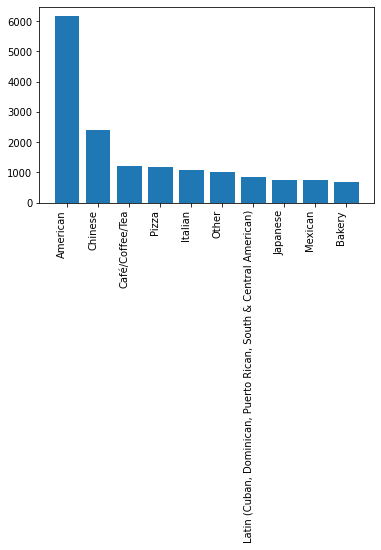

In [ ]:
fig,ax = plt.subplots()
fig.autofmt_xdate(rotation=90)
ax.bar(cucina.index[:10],cucina[:10])

10. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
quartieri = df['borough'].value_counts()
quartieri

Manhattan        10259
Brooklyn          6086
Queens            5656
Bronx             2338
Staten Island      969
Name: borough, dtype: int64

11. Visualizzi i dati precedenti in un grafico a torta

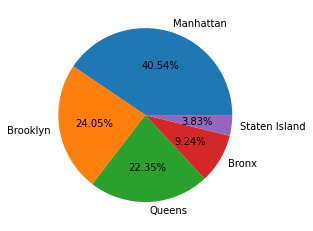

In [ ]:
fig,ax = plt.subplots()
ax.pie(quartieri, autopct='%.2f%%', labels=quartieri.index)
plt.show()

12. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

NameError: ignored

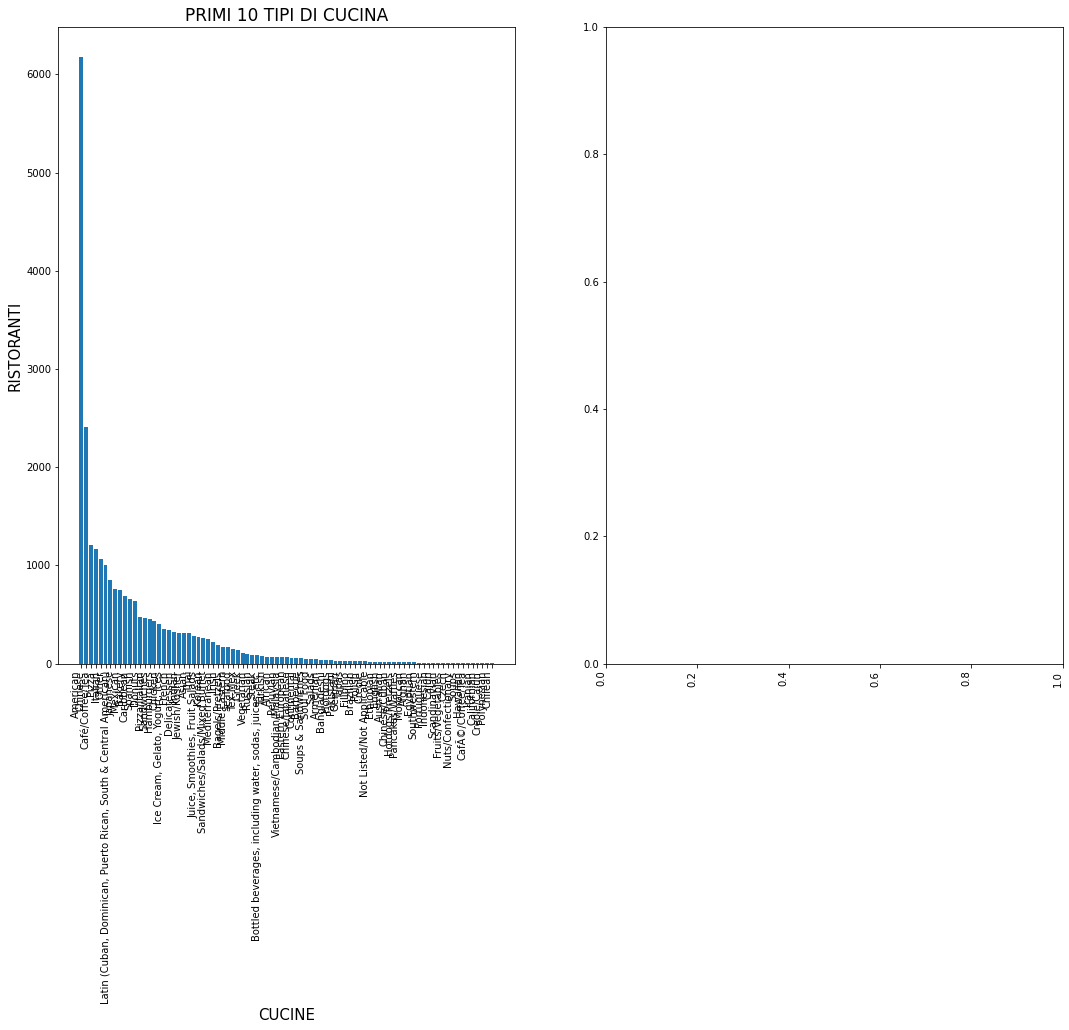

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(13)
fig.autofmt_xdate(rotation=90)
ax[0].bar(cucina.index,cucina)
ax[0].set_title("PRIMI 10 TIPI DI CUCINA", fontsize=17)
ax[0].set_xlabel("CUCINE", fontsize=15)
ax[0].set_ylabel("RISTORANTI", fontsize=15)
ax[1].pie(num)
ax[1].set_title("RISTORANTI PER OGNI QUARTIERE", fontsize=17)
ax[1].legend(labels)
ax[1].pie(num,autopct="%1.2f%%")
fig.tight_layout()
plt.show()

13. crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono
americani

In [ ]:
df["cuisine"].loc[df['cuisine'] !="American"] ='non American'
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


14. visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato
deve essere il seguente:

In [ ]:
df.groupby(['borough', 'cuisine']).count()

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

15. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve
essere il seguente:

In [ ]:
df.unstack().reset_index('')